# Goal

 Replicate the findings in https://arxiv.org/pdf/2310.10165

1. Define the Hilbert Space
2. Define the Hamiltonian
3. Define the Operators
4. WIP: Take the partial trace over
5. Optimize the parameters

In [3]:
import numpy as np

# Auxiliary functions

In [4]:
def generate_jz(n):
    return np.diag([(n - 2*k)*.5 for k in range(n+1)])

In [5]:
def generate_hamiltonian(
    eta_s : float = 0,
    gamma_s: float = 0,
    delta_s: float = 0,
    total_n: int = 1
) -> np.array:
    Jz = generate_jz(total_n)
    Jz_squared = Jz**2
    
    Jx = np.zeros((total_n+1, total_n+1))
    for k in range(total_n): # DOUBLE CHECK WITH NIKITA
        Jx[k+1,k] = np.sqrt((k+1)*(total_n-k))
        Jx[k,k+1] = np.sqrt((k+1)*(total_n-k))

    return np.sum(
        [
            eta_s * Jz_squared, # eta_s * J_z^2
            -1 * gamma_s * Jx, # - gamma_s * J_x
            -1 * delta_s * Jz# -delta_s * J_z
        ], axis=0 # Sum the matrices elementwise
    )

In [6]:
def generate_coupled_hamiltonian(
    eta_s : float = 0,
    gamma_s: float = 0,
    delta_s: float = 0,
    total_n: int = 1,
    eta_anc : float = 0,
    gamma_anc: float = 0,
    delta_anc: float = 0,
    total_n_anc: int = 1,
    alpha : float = 0
):
    system_hamiltonian = generate_hamiltonian(eta_s, gamma_s,delta_s,total_n)
    ancillary_hamiltonian = generate_hamiltonian(eta_anc, gamma_anc,delta_anc,total_n_anc)
    
    return np.sum(
        [
            np.kron(system_hamiltonian, np.identity(total_n_anc+1)), # H_S X 1
            np.kron( np.identity(total_n+1), ancillary_hamiltonian), # 1 X H_A
            alpha * np.kron(generate_jz(total_n), generate_jz(total_n_anc)) # J_z X J_z
        ],
        axis=0
    )

In [7]:
def full_plot(
    eta_s : float = 0,
    gamma_s: float = 0,
    delta_s: float = 0,
    total_n: int = 1
):
    initial_state = [1] + [0 for _ in range(total_n)]
    visualization.finite_dimensional_populations_over_time(
        hamiltonian=generate_hamiltonian(eta_s=eta_s, gamma_s=gamma_s,delta_s=delta_s,total_n=total_n),
        rho0=np.outer(initial_state, initial_state),
    )

In [8]:
generate_hamiltonian(eta_s=1, gamma_s=2,delta_s=3,total_n=4)

array([[-2.        , -4.        ,  0.        ,  0.        ,  0.        ],
       [-4.        , -2.        , -4.89897949,  0.        ,  0.        ],
       [ 0.        , -4.89897949,  0.        , -4.89897949,  0.        ],
       [ 0.        ,  0.        , -4.89897949,  4.        , -4.        ],
       [ 0.        ,  0.        ,  0.        , -4.        , 10.        ]])

In [9]:
v = np.array([1,0,0,0,0])
np.outer(v,v)

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [10]:
full_plot(eta_s=1, gamma_s=2,delta_s=2,total_n=1)

NameError: name 'visualization' is not defined

In [11]:
full_plot(eta_s=0, gamma_s=2,delta_s=0,total_n=4)

NameError: name 'visualization' is not defined

# Visualize state evolution

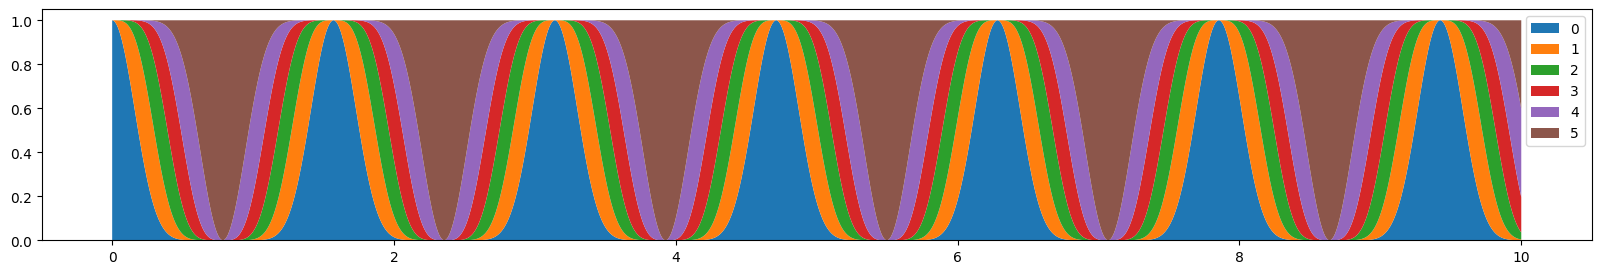

In [57]:
full_plot(eta_s=0, gamma_s=2,delta_s=0,total_n=5)

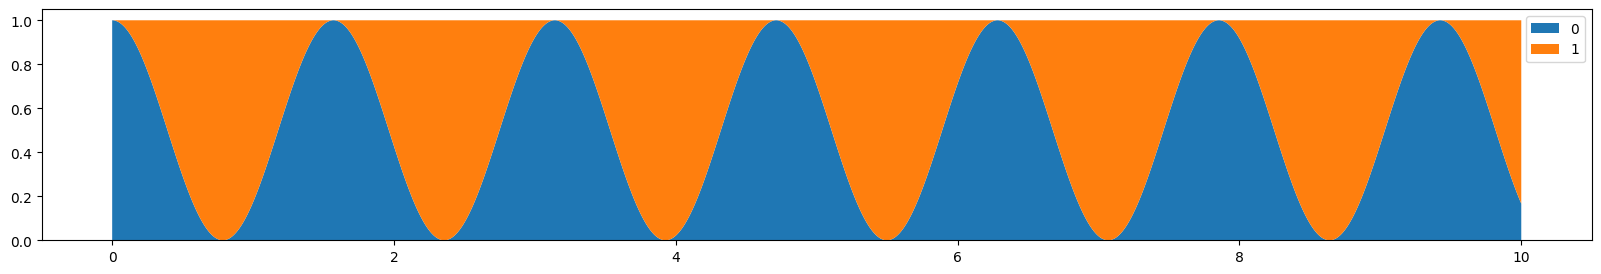

In [58]:
full_plot(eta_s=0, gamma_s=2,delta_s=0,total_n=1)

In [59]:
generate_coupled_hamiltonian()

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

# Replicate Nikita's code